In [2]:
import pandas as pd
import numpy as np

Train = pd.read_csv("GUIDE_Train.csv")
Test = pd.read_csv("GUIDE_Test.csv", low_memory=False)

In [3]:
Train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
Test.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [5]:
Train.shape, Test.shape

((9516837, 45), (4147992, 46))

In [6]:
Test.drop(['Usage'], axis=1, inplace=True)

In [7]:
Train.shape, Test.shape

((9516837, 45), (4147992, 45))

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [10]:
Train.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [11]:
Test.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,...,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06
mean,8.462250e+11,1.756698e+02,6.780345e+04,4.072191e+05,1.008391e+02,2.529514e+03,9.575061e+04,1.283939e+05,2.873898e+05,1.504279e+05,...,3.342993e+03,8.808119e+02,2.618998e+05,1.074020e+05,3.583541e+03,4.899529e+00,6.466873e+01,2.222218e+02,1.344570e+03,9.883839e+03
std,4.923351e+11,3.708729e+02,1.178736e+05,4.550578e+05,4.082934e+02,1.044138e+04,1.615628e+04,3.457595e+04,1.400920e+05,3.734754e+04,...,5.096996e+02,1.238317e+01,8.208434e+04,3.260346e+04,9.012124e+01,7.001299e-01,9.269678e+00,6.499822e+01,3.626851e+02,2.696302e+03
min,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,8.000000e+00,4.110000e+02,2.365900e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.300000e+01,8.818000e+03,2.228970e+05,7.000000e+00,9.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.730000e+02,7.944000e+04,6.711010e+05,3.900000e+01,1.160000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.138000e+03,5.997000e+05,1.721457e+06,9.520000e+03,1.131690e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [12]:
Train['Category'].unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

In [13]:
Test['Category'].unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation', 'WebExploit'],
      dtype=object)

In [14]:
Train.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [15]:
Test.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [16]:
Train.duplicated().sum()


np.int64(22559)

In [17]:
Test.duplicated().sum()

np.int64(104)

In [18]:
Train.drop_duplicates(inplace=True)

In [19]:
Test.drop_duplicates(inplace=True)

In [20]:
Train.duplicated().sum()

np.int64(0)

In [21]:
Test.duplicated().sum()

np.int64(0)

In [22]:
Train.shape

(9494278, 45)

In [23]:
Test.shape

(4147888, 45)

In [24]:
missing_percentage = Train.isnull().mean() * 100

In [25]:
missing_percentage

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.501666
IncidentGrade          0.540557
ActionGrouped         99.409687
ActionGranular        99.409687
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.980344
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [26]:
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [27]:
data_cleaned = Train.drop(columns=columns_to_drop)
data_cleaned

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [28]:
data_cleaned.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51322
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [29]:
data_cleaned.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive', nan],
      dtype=object)

In [30]:
data_cleaned.dropna(subset=['IncidentGrade'], inplace=True)

In [31]:
data_cleaned.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

In [32]:
print(data_cleaned.shape)
data_cleaned

(9442956, 35)


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [33]:
data_cleaned.nunique()

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
Timestamp              755654
DetectorId               7813
AlertTitle              79952
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State     

In [34]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9442956 entries, 0 to 9516836
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [35]:
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])

In [36]:
data_cleaned['Timestamp'].head()

0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [37]:
# Extract day, month, and hour from the Timestamp
data_cleaned['Day'] = data_cleaned['Timestamp'].dt.day
data_cleaned['Month'] = data_cleaned['Timestamp'].dt.month
data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour
data_cleaned['Year'] = data_cleaned['Timestamp'].dt.year


# Drop the original Timestamp column
data_cleaned.drop('Timestamp', axis=1, inplace=True)

print(data_cleaned.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  ...  \
0      InitialAccess    TruePositive         Ip      Related  ...   
1       Exfiltration   FalsePositive       User     Impacted  ...   
2      InitialAccess   FalsePositive        Url      Related  ...   
3  CommandAndControl  BenignPositive        Url      Related  ...   
4          Execution    TruePositive       User     Impacted  ...   

   ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  Day  Month  \
0            3586         5         66           31      6      3    4 

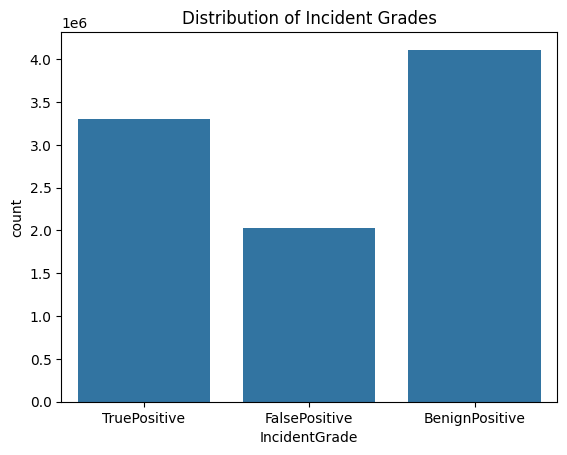

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=Train)
plt.title('Distribution of Incident Grades')
plt.show()

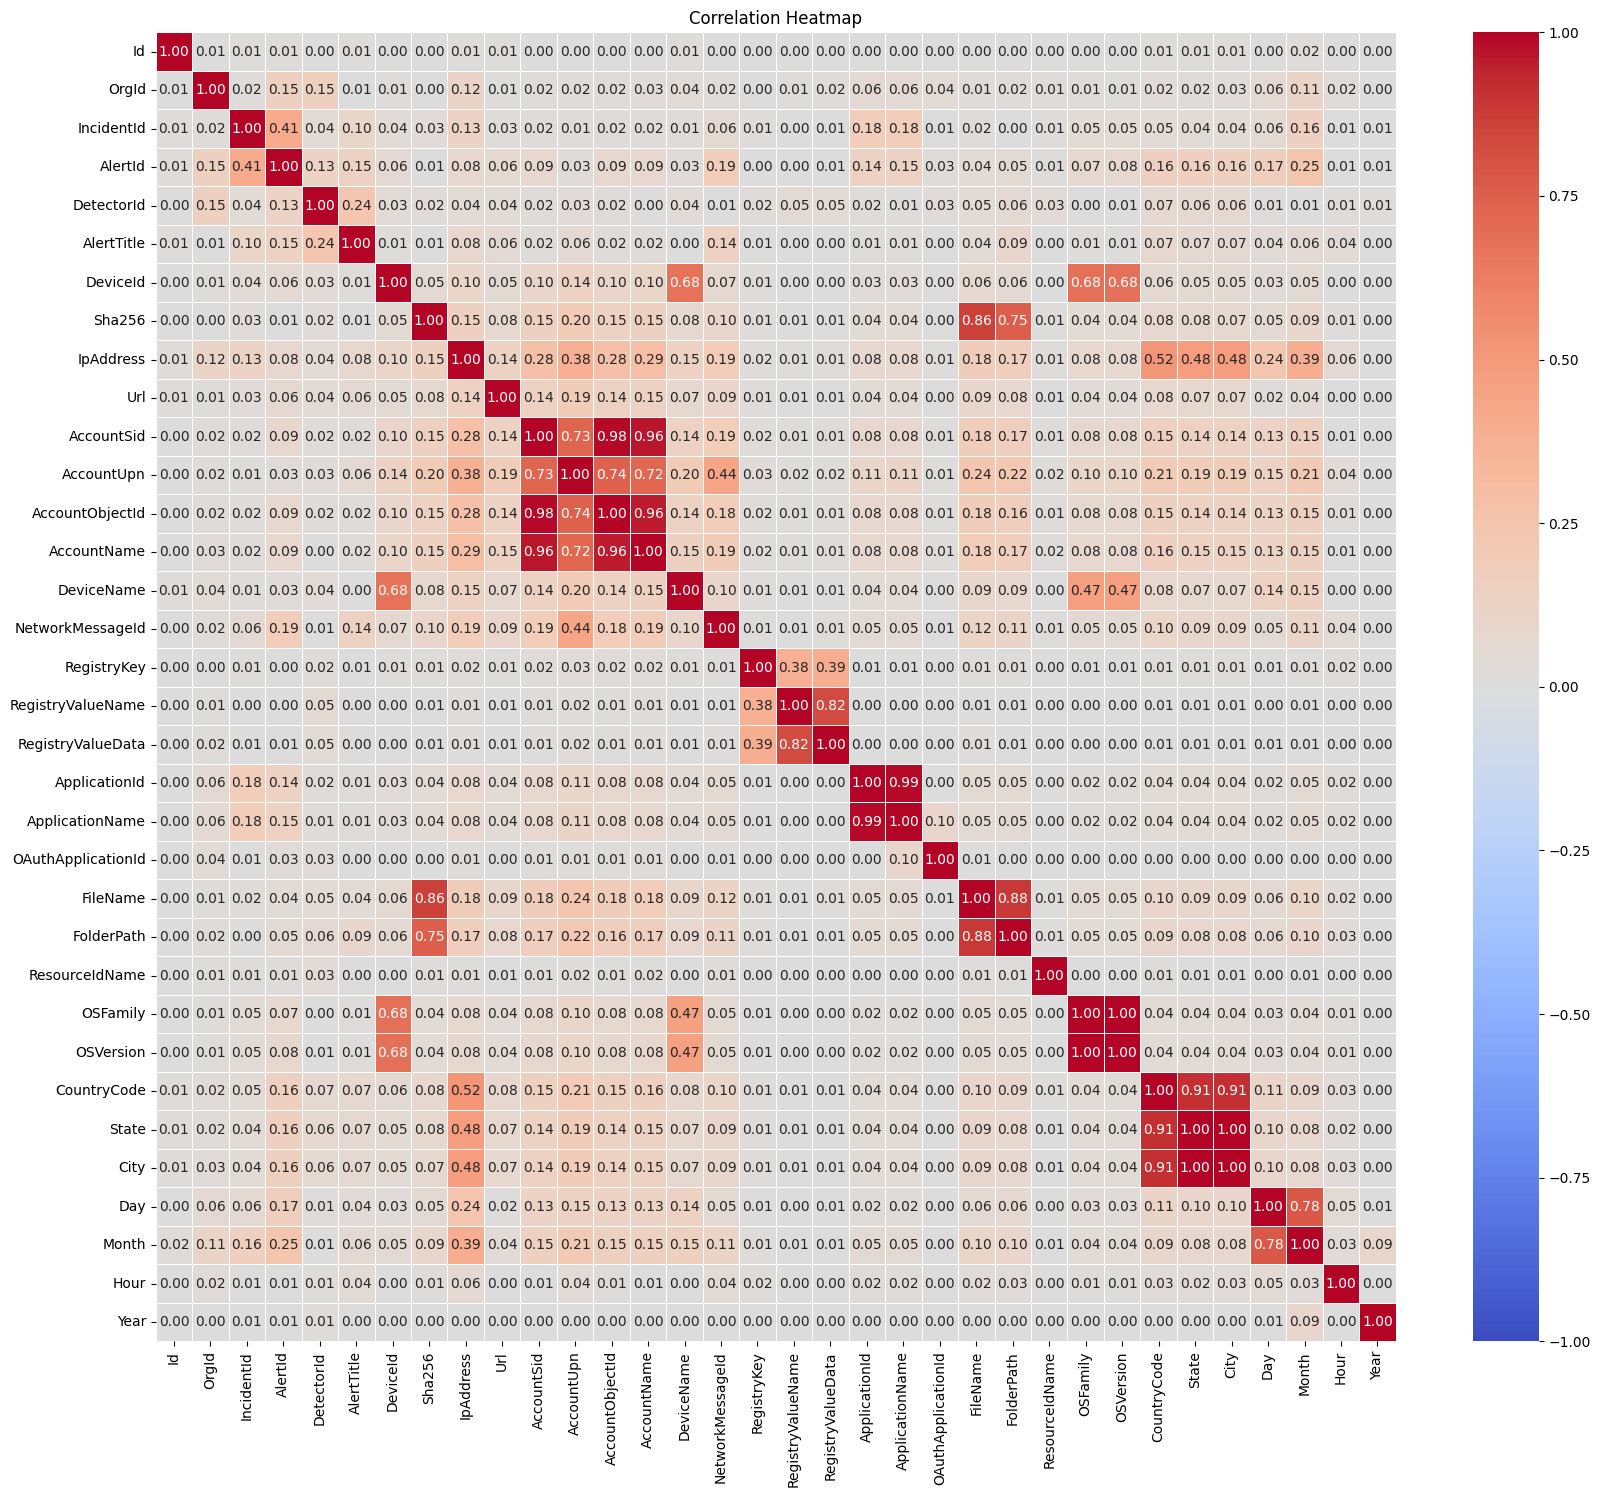

In [39]:
# Select numerical columns
numerical_df = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y])
                    for x, y in zip(*high_corr_var)
                    if x != y and x < y]

# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    columns_to_remove.add(col2)  # or col1, based on your strategy

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = data_cleaned.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
print(df_cleaned_corr.head())

Columns removed: ['AccountObjectId', 'RegistryValueData', 'AccountName', 'City', 'State', 'FolderPath', 'OSVersion', 'ApplicationName', 'FileName']
              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  ...  \
0      InitialAccess    TruePositive         Ip      Related  ...   
1       Exfiltration   FalsePositive       User     Impacted  ...   
2      InitialAccess   FalsePositive        Url      Related  ...   
3  CommandAndControl  BenignPositive        Url      Related  ...   
4          Execution    TruePositive       User     Impacted  ...   

   R

In [41]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr

categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}
# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr)

                    Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0         180388628218      0         612   123247           7           6   
1         455266534868     88         326   210035          58          43   
2        1056561957389    809       58352   712507         423         298   
3        1279900258736     92       32992   774301           2           2   
4         214748368522    148        4359   188041           9          74   
...                ...    ...         ...      ...         ...         ...   
9516832  1056561956622      0          90   496631           7           6   
9516833  1228360650033     59      196410   748366           2           2   
9516834   867583395122     44       14117     7425          78          57   
9516835   395136991850     43         644     8973          52          10   
9516836   678604833923     16      141721   644106          24         348   

         Category  IncidentGrade  EntityType  EvidenceRole  ...

In [42]:
import joblib

# Save label encoders for categorical features

for column, le in label_encoders.items():
    joblib.dump(le, f'{column}_label_encoder.pkl')

In [43]:
df_cleaned_corr.to_csv('train_data_processed.csv', index=False)

In [44]:
df_cleaned_corr

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,180388628218,0,612,123247,7,6,10,2,15,1,...,635,2251,881,3586,5,31,4,6,6,2024
1,455266534868,88,326,210035,58,43,7,1,32,0,...,635,2251,881,3586,5,242,14,6,3,2024
2,1056561957389,809,58352,712507,423,298,10,1,31,1,...,635,2251,881,3586,5,242,13,6,4,2024
3,1279900258736,92,32992,774301,2,2,1,0,31,1,...,635,2251,881,3586,5,242,10,6,16,2024
4,214748368522,148,4359,188041,9,74,6,2,32,0,...,635,2251,881,3586,5,242,15,6,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,10,2,6,1,...,635,2251,881,3586,5,242,8,6,15,2024
9516833,1228360650033,59,196410,748366,2,2,1,0,31,1,...,635,2251,881,3586,5,242,6,6,9,2024
9516834,867583395122,44,14117,7425,78,57,7,0,21,0,...,635,2251,881,3586,5,242,11,6,22,2024
9516835,395136991850,43,644,8973,52,10,9,0,15,1,...,635,2251,881,3586,5,242,20,5,23,2024


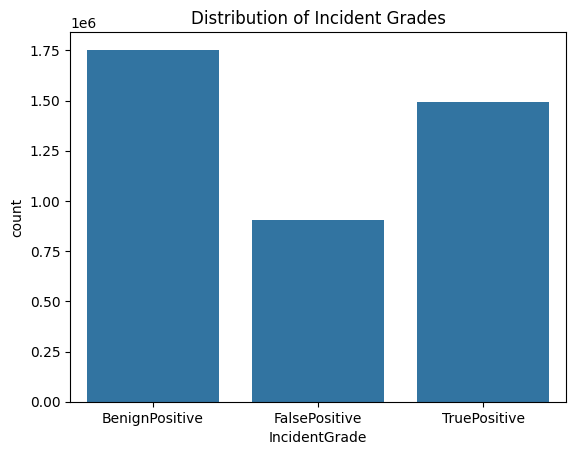

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=Test)
plt.title('Distribution of Incident Grades')
plt.show()

In [46]:
Test['Timestamp'] = pd.to_datetime(Test['Timestamp'])
# Extract day, month, and hour from the Timestamp
Test['Day'] = Test['Timestamp'].dt.day
Test['Month'] = Test['Timestamp'].dt.month
Test['Hour'] = Test['Timestamp'].dt.hour
Test['Year'] = Test['Timestamp'].dt.year

# Drop the original Timestamp column
Test.drop('Timestamp', axis=1, inplace=True)

# Check the new DataFrame
print(Test.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped  ... AntispamDirection SuspicionLevel LastVerdict  \
0           NaN  ...               NaN     Suspicious  Susp

In [47]:
Test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)
     

In [48]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 39 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   MitreTechniques     object 
 8   IncidentGrade       object 
 9   ActionGrouped       object 
 10  ActionGranular      object 
 11  EntityType          object 
 12  EvidenceRole        object 
 13  DeviceId            int64  
 14  Sha256              int64  
 15  IpAddress           int64  
 16  Url                 int64  
 17  AccountSid          int64  
 18  AccountUpn          int64  
 19  DeviceName          int64  
 20  NetworkMessageId    int64  
 21  EmailClusterId      float64
 22  RegistryKey         int64  
 23  RegistryValueName   int64  
 24  ApplicationId       int64  
 

In [49]:
Test = Test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour', 'Year']]
Test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,635,2251,881,3586,5,242,4,6,22,2024
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,635,2251,881,3586,0,242,3,6,12,2024
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,635,2251,881,3586,5,242,8,6,3,2024
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,635,2251,881,3586,5,242,12,6,12,2024
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,635,2251,881,3586,5,242,6,6,17,2024


In [50]:
# Load label encoder

loaded_label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']  # list your categorical columns
for column in categorical_cols:
    loaded_label_encoders[column] = joblib.load(f'{column}_label_encoder.pkl')

In [51]:
# Apply label encoding to categorical features
for column, le in loaded_label_encoders.items():
    if column in Test.columns:
        Test[column] = le.transform(Test[column])

Test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,1245540519230,657,11767,87199,524,563,11,0,32,0,...,635,2251,881,3586,5,242,4,6,22,2024
1,1400159342154,3,91158,632273,2,2,1,0,19,0,...,635,2251,881,3586,0,242,3,6,12,2024
2,1279900255923,145,32247,131719,2932,10807,11,0,27,1,...,635,2251,881,3586,5,242,8,6,3,2024
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,635,2251,881,3586,5,242,12,6,12,2024
4,515396080539,363,7615,5944,27,18,5,0,32,0,...,635,2251,881,3586,5,242,6,6,17,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,139,120,10,0,32,0,...,635,2251,881,3586,5,242,4,6,3,2024
4147988,438086666953,1323,31001,304819,219,196,10,0,32,0,...,635,2251,881,3586,5,242,4,6,19,2024
4147989,1297080124487,47,3653,7243,57,29,1,1,15,1,...,635,2251,881,3586,5,242,15,6,0,2024
4147990,627065226886,70,4243,19142,1,1,10,0,22,0,...,635,2251,881,3586,5,242,11,6,16,2024


In [52]:
Test.to_csv('test_data_processed.csv', index=False)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

In [54]:
df_train = pd.read_csv("train_data_processed.csv")
df_test = pd.read_csv("test_data_processed.csv")

In [55]:
df_train

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,180388628218,0,612,123247,7,6,10,2,15,1,...,635,2251,881,3586,5,31,4,6,6,2024
1,455266534868,88,326,210035,58,43,7,1,32,0,...,635,2251,881,3586,5,242,14,6,3,2024
2,1056561957389,809,58352,712507,423,298,10,1,31,1,...,635,2251,881,3586,5,242,13,6,4,2024
3,1279900258736,92,32992,774301,2,2,1,0,31,1,...,635,2251,881,3586,5,242,10,6,16,2024
4,214748368522,148,4359,188041,9,74,6,2,32,0,...,635,2251,881,3586,5,242,15,6,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442951,1056561956622,0,90,496631,7,6,10,2,6,1,...,635,2251,881,3586,5,242,8,6,15,2024
9442952,1228360650033,59,196410,748366,2,2,1,0,31,1,...,635,2251,881,3586,5,242,6,6,9,2024
9442953,867583395122,44,14117,7425,78,57,7,0,21,0,...,635,2251,881,3586,5,242,11,6,22,2024
9442954,395136991850,43,644,8973,52,10,9,0,15,1,...,635,2251,881,3586,5,242,20,5,23,2024


In [56]:
df_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,1245540519230,657,11767,87199,524,563,11,0,32,0,...,635,2251,881,3586,5,242,4,6,22,2024
1,1400159342154,3,91158,632273,2,2,1,0,19,0,...,635,2251,881,3586,0,242,3,6,12,2024
2,1279900255923,145,32247,131719,2932,10807,11,0,27,1,...,635,2251,881,3586,5,242,8,6,3,2024
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,635,2251,881,3586,5,242,12,6,12,2024
4,515396080539,363,7615,5944,27,18,5,0,32,0,...,635,2251,881,3586,5,242,6,6,17,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147883,541165881145,262,3017,227156,139,120,10,0,32,0,...,635,2251,881,3586,5,242,4,6,3,2024
4147884,438086666953,1323,31001,304819,219,196,10,0,32,0,...,635,2251,881,3586,5,242,4,6,19,2024
4147885,1297080124487,47,3653,7243,57,29,1,1,15,1,...,635,2251,881,3586,5,242,15,6,0,2024
4147886,627065226886,70,4243,19142,1,1,10,0,22,0,...,635,2251,881,3586,5,242,11,6,16,2024


In [57]:
#Splitting data
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Evaluating Logistic Regression Model...
Accuracy: 0.4349520701136084
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.61    821451
           1       0.00      0.00      0.00    406329
           2       0.00      0.00      0.00    660812

    accuracy                           0.43   1888592
   macro avg       0.14      0.33      0.20   1888592
weighted avg       0.19      0.43      0.26   1888592



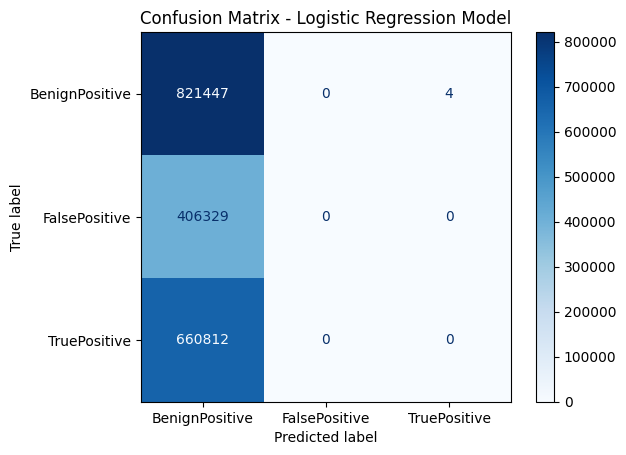

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Model
model_logistic = LogisticRegression(random_state=42)

# Print message for evaluation
print(f"\nEvaluating Logistic Regression Model...")

# Fit the logistic regression model
model_logistic.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model_logistic.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


Evaluating RandomForest...
Accuracy: 0.77444201818074
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79    821451
           1       0.94      0.51      0.66    406329
           2       0.97      0.68      0.80    660812

    accuracy                           0.77   1888592
   macro avg       0.86      0.72      0.75   1888592
weighted avg       0.83      0.77      0.77   1888592



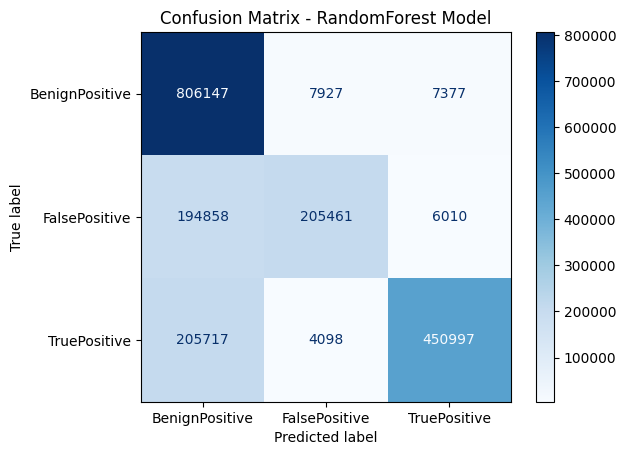

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize RandomForest with optimizations
model_rf = RandomForestClassifier(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit the depth of the trees
    max_features='sqrt',    # Use the square root of features
    n_jobs=-1,              # Enable parallel processing
    random_state=42
)

# Print message for evaluation
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest Model')
plt.show()



Evaluating XGBoost...
Accuracy: 0.9151081864161238
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    821451
           1       0.93      0.84      0.89    406329
           2       0.94      0.91      0.92    660812

    accuracy                           0.92   1888592
   macro avg       0.92      0.90      0.91   1888592
weighted avg       0.92      0.92      0.91   1888592



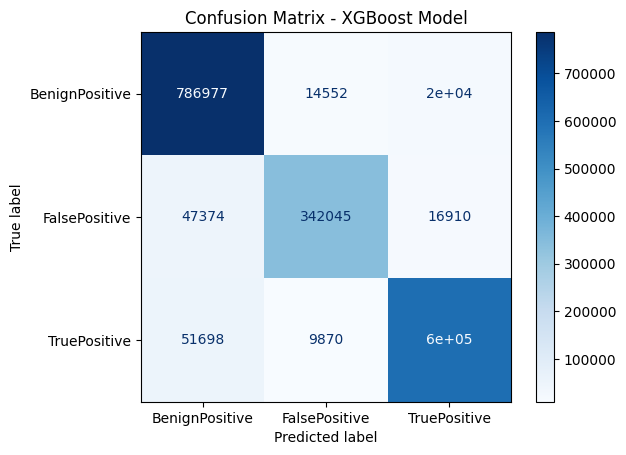

In [60]:
model_xgb = XGBClassifier(random_state=42)

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()


Evaluating LGBoost...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.353204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3955
[LightGBM] [Info] Number of data points in the train set: 7554364, number of used features: 28
[LightGBM] [Info] Start training from score -0.831452
[LightGBM] [Info] Start training from score -1.537704
[LightGBM] [Info] Start training from score -1.050653
Accuracy: 0.8973669273193998
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90    821451
           1       0.93      0.80      0.86    406329
           2       0.94      0.88      0.91    660812

    accuracy                           0.90   1888592
   macro avg       0.91      0.88      0.89   1888592
weighted avg       0.90      0.90      0.90   1888592



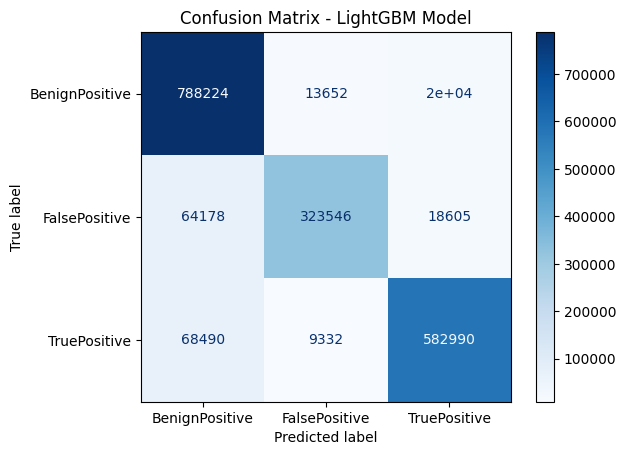

In [61]:
model_lgb = LGBMClassifier(random_state = 42)

#LGBoost
print(f"\nEvaluating LGBoost...")

# Fit the model
model_lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = model_lgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()


Evaluating Decision Tree...
Accuracy: 0.773066919694672
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79    821451
           1       0.86      0.55      0.67    406329
           2       0.93      0.71      0.80    660812

    accuracy                           0.77   1888592
   macro avg       0.83      0.73      0.75   1888592
weighted avg       0.81      0.77      0.77   1888592



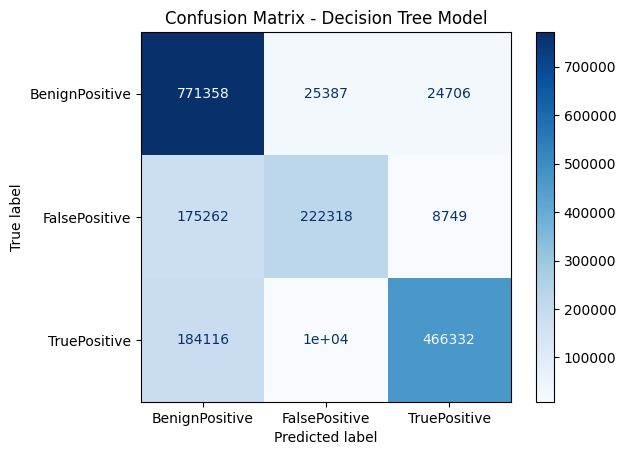

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree with optimizations
model_dt = DecisionTreeClassifier(
    max_depth=10,            # Limit the depth of the tree
    random_state=42          # For reproducibility
)

# Print message for evaluation
print(f"\nEvaluating Decision Tree...")

# Fit the Decision Tree model
model_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = model_dt.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# Example: Using Random Forest Classifier or XGBoost (XGBoost with early stopping)
model_xgb = XGBClassifier(
    n_estimators=100,  # Control the number of trees
    max_depth=5,        # Control the depth of the trees
    learning_rate=0.1,  # Lower learning rate
    subsample=0.8,      # Use a fraction of the data
    colsample_bytree=0.8,  # Use a fraction of features
    n_jobs=-1           # Use all available CPU cores
)

# Using 3-fold cross-validation (fewer folds for faster performance)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Evaluate using cross-validation
cross_val_scores = cross_val_score(model_xgb, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average Cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [0.84051289 0.83817537 0.83768095]
Average Cross-validation score: 0.8387897377299861


Confusion Matrix:
[[786977  14552  19922]
 [ 47374 342045  16910]
 [ 51698   9870 599244]]


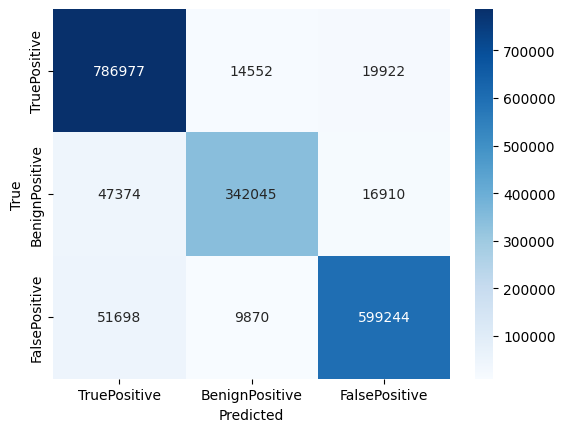

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Ensure model is trained
model_xgb = XGBClassifier()  # Initialize the model
model_xgb.fit(X_train, y_train)  # Train the model with your training data

# Get predictions
y_pred = model_xgb.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['TruePositive', 'BenignPositive', 'FalsePositive'], 
            yticklabels=['TruePositive', 'BenignPositive', 'FalsePositive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [76]:
import joblib

# Save the trained XGBoost model to a file
joblib.dump(model_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [77]:
df_test.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'ApplicationId',
       'OAuthApplicationId', 'ResourceIdName', 'OSFamily', 'CountryCode',
       'Day', 'Month', 'Hour', 'Year'],
      dtype='object')

In [78]:
X2 = df_test[['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'ApplicationId',
       'OAuthApplicationId', 'ResourceIdName', 'OSFamily', 'CountryCode',
       'Day', 'Month', 'Hour', 'Year']]
y2= df_test['IncidentGrade']

In [79]:
import joblib

# Load the model
loaded_model_rf = joblib.load('xgboost_model.pkl')

# Check the model type
print(type(loaded_model_rf))

<class 'xgboost.sklearn.XGBClassifier'>


In [80]:
y_pred_new = loaded_model_rf.predict(X2)

In [82]:
print("Accuracy:", accuracy_score(y2, y_pred_new))
print("Classification Report:")
print(classification_report(y2, y_pred_new))

Accuracy: 0.8859458114587472
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90   1752895
           1       0.87      0.79      0.83    902664
           2       0.92      0.90      0.91   1492329

    accuracy                           0.89   4147888
   macro avg       0.89      0.87      0.88   4147888
weighted avg       0.89      0.89      0.89   4147888



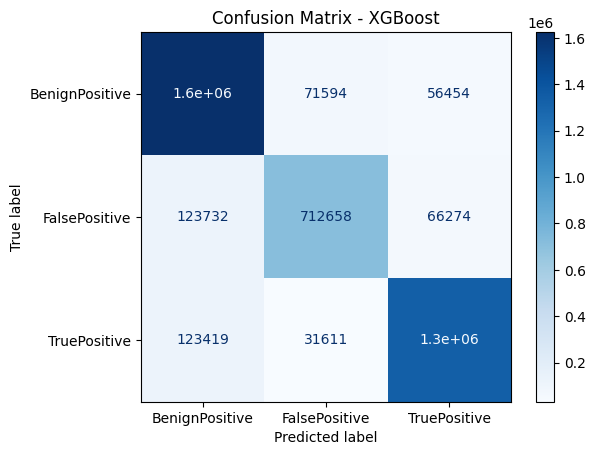

In [83]:
# Generate the confusion matrix
cm = confusion_matrix(y2, y_pred_new)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

Model Evaluation Output (Example)
Macro-F1 Score: 0.88
Precision:
True Positive (TP): 0.87
Benign Positive (BP): 0.87
False Positive (FP): 0.92
Recall:
True Positive (TP): 0.93
Benign Positive (BP): 0.79
False Positive (FP): 0.90
F1-Score:
True Positive (TP): 0.90
Benign Positive (BP): 0.83
False Positive (FP): 0.91
Accuracy: 0.89
-----------
Model Predictions (on Randomly Selected Test Incidents)
Predicted Class for Incident #3347209: FalsePositive
Predicted Class for Incident #3873860: FalsePositive
Predicted Class for Incident #2332182: TruePositive
Predicted Class for Incident #2399204: FalsePositive
Predicted Class for Incident #3871898: FalsePositive
Feature Importance (from model)
Feature 2 (OrgId) Importance: 0.11
Feature 24 (CountryCode) Importance: 0.10
Feature 5 (DetectorId) Importance: 0.09
Feature 7 (Category) Importance: 0.07
Feature 18 (RegistryKey) Importance: 0.07


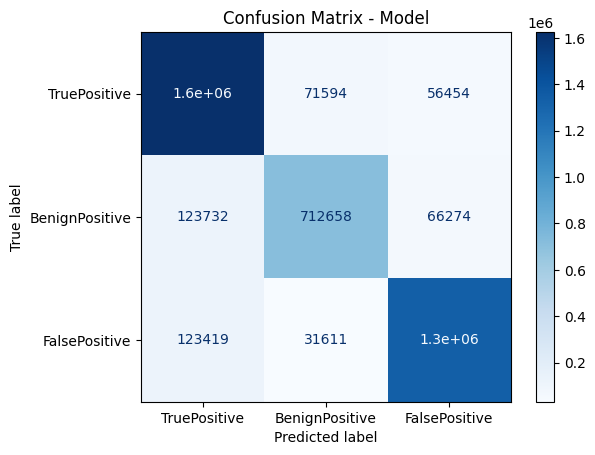

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'model_xgb' is your pre-trained model
# X2 is your test data and y2 is the true labels for the test data

# Get predictions for X2 (test data)
y_pred_new = model_xgb.predict(X2)  # Get predictions for your test data

# Accuracy
accuracy = accuracy_score(y2, y_pred_new)

# Generate classification report
report = classification_report(y2, y_pred_new, target_names=["TruePositive", "BenignPositive", "FalsePositive"], output_dict=True)

# Extract precision, recall, and f1-score for each class
precision_tp = report["TruePositive"]["precision"]
recall_tp = report["TruePositive"]["recall"]
f1_tp = report["TruePositive"]["f1-score"]

precision_bp = report["BenignPositive"]["precision"]
recall_bp = report["BenignPositive"]["recall"]
f1_bp = report["BenignPositive"]["f1-score"]

precision_fp = report["FalsePositive"]["precision"]
recall_fp = report["FalsePositive"]["recall"]
f1_fp = report["FalsePositive"]["f1-score"]

# Macro-F1 Score
macro_f1 = report["macro avg"]["f1-score"]

# Print the model evaluation output
print("Model Evaluation Output (Example)")
print(f"Macro-F1 Score: {macro_f1:.2f}")
print("Precision:")
print(f"True Positive (TP): {precision_tp:.2f}")
print(f"Benign Positive (BP): {precision_bp:.2f}")
print(f"False Positive (FP): {precision_fp:.2f}")
print("Recall:")
print(f"True Positive (TP): {recall_tp:.2f}")
print(f"Benign Positive (BP): {recall_bp:.2f}")
print(f"False Positive (FP): {recall_fp:.2f}")
print("F1-Score:")
print(f"True Positive (TP): {f1_tp:.2f}")
print(f"Benign Positive (BP): {f1_bp:.2f}")
print(f"False Positive (FP): {f1_fp:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("-----------")

# AUTOMATED Model Predictions for Randomly Selected Test Incidents
# Randomly select 3 incidents from the test data (X2)
random_incidents_indices = np.random.choice(X2.index, size=5, replace=False)  # Randomly select 3 incident indices
test_incidents = X2.loc[random_incidents_indices].index  # Get incident IDs
test_predictions = y_pred_new[random_incidents_indices]  # Get predictions for these incidents

# Map numeric predictions to class names
label_mapping = {0: "TruePositive", 1: "BenignPositive", 2: "FalsePositive"}

# Display the predictions for the randomly selected incidents
print("Model Predictions (on Randomly Selected Test Incidents)")
for incident, prediction in zip(test_incidents, test_predictions):
    print(f"Predicted Class for Incident #{incident}: {label_mapping[prediction]}")

# Feature Importance (for a tree-based model, e.g., RandomForest or XGBoost)
# Assuming you are using a RandomForest model or any other tree-based model like XGBoost
# and feature importance is extracted from the model's attribute
if hasattr(model_xgb, "feature_importances_"):
    feature_importance = model_xgb.feature_importances_  # Get feature importance from the model

    # Display Feature Importance (for tree-based models)
    print("Feature Importance (from model)")
    feature_names = X2.columns  # Use feature names from the test data
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Get the top 5 most important features
    top_5_features = importance_df.head(5)

    for i, row in top_5_features.iterrows():
        print(f"Feature {i+1} ({row['Feature']}) Importance: {row['Importance']:.2f}")
else:
    print("Model does not support feature importance extraction")

# Generate Confusion Matrix
cm = confusion_matrix(y2, y_pred_new, labels=[0, 1, 2])  # Use numeric labels (0, 1, 2)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['TruePositive', 'BenignPositive', 'FalsePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Model')
plt.show()
